In [1]:
# Import the CSV file from URL

import requests

download_url = "https://gitlab.com/perteghella/python-data-visualization/-/raw/master/02-Pandas/titanic.csv"
target_csv_path = "titanic.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download CSV ready")

Download CSV ready


In [2]:
!pip install seaborn

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# figure size in inches
#from matplotlib import rcParams
#rcParams['figure.figsize'] = 15,6

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
# Initial import

data = pd.read_csv('titanic.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.fillna(0, inplace = True)
# Convert the survived column to strings for easier reading
data['Survived'] = data['Survived'].map({
    0: 'Died',
    1: 'Survived'
})
data.head()

PassengerId  Survived  Pclass  \
0            1      Died       3   
1            2  Survived       1   
2            3  Survived       3   
3            4  Survived       1   
4            5      Died       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     0        S

In [5]:
# Convert the Embarked column to strings for easier reading
data['Embarked'] = data['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton',
})

data.head()

PassengerId  Survived  Pclass  \
0            1      Died       3   
1            2  Survived       1   
2            3  Survived       3   
3            4  Survived       1   
4            5      Died       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin     Embarked  
0      0         A/5 21171   7.2500     0  Southampton  
1      0          PC 17599  71.2833   C85    Cherbourg  
2      0  STON/O2. 3101282   7.9250     0  Southampton  
3      0            113803  53.1000  C123  Southampton  
4      0            373450   8.0500     0  Southampton

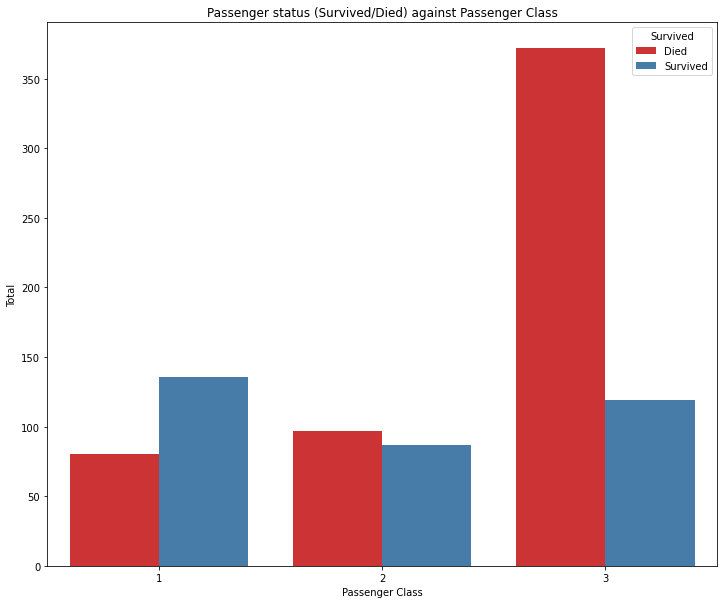

In [7]:
# How many passengers Lived or Dies in each Passenger Class
fig, ax = plt.subplots(1,1, figsize = (12,10))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


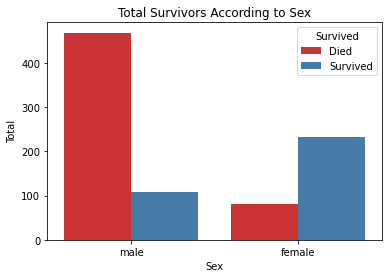

In [8]:
# How many people lived or Died according to their Sex
print(pd.crosstab(data["Sex"],data.Survived))
ax = sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'Sex', ylabel='Total')
plt.show()

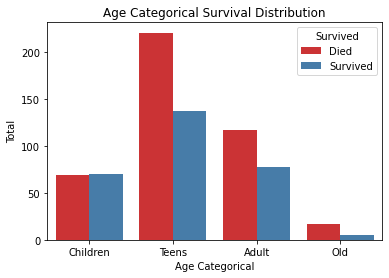

In [9]:
# Survivors with regards to Age groups
# We look at Age column and set Intevals on the ages and the map them to their categories as
# (Children, Teen, Adult, Old)
interval = (0,18,35,60,120)
categories = ['Children','Teens','Adult', 'Old']
data['Age_cats'] = pd.cut(data.Age, interval, labels = categories)

ax = sns.countplot(x = 'Age_cats',  data = data, hue = 'Survived', palette = 'Set1')

ax.set(xlabel='Age Categorical', ylabel='Total',
       title="Age Categorical Survival Distribution")

plt.show()

Survived     Died  Survived
Embarked                   
Cherbourg      75        93
Queenstown     47        30
Southampton   427       217


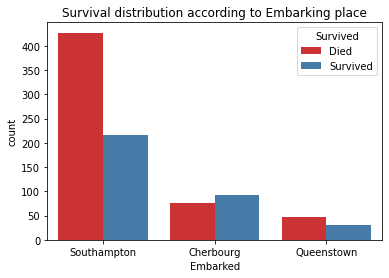

In [10]:
# Survival distribution based on where passengers embarked from
print(pd.crosstab(data['Embarked'], data.Survived))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = data)
ax.set(title = 'Survival distribution according to Embarking place')
plt.show()

In [11]:
# Drop Unwanted Features
data.drop(['Name','Ticket','Cabin','PassengerId','Age_cats'], 1, inplace =True)
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare     Embarked
0      Died       3    male  22.0      1      0   7.2500  Southampton
1  Survived       1  female  38.0      1      0  71.2833    Cherbourg
2  Survived       3  female  26.0      0      0   7.9250  Southampton
3  Survived       1  female  35.0      1      0  53.1000  Southampton
4      Died       3    male  35.0      0      0   8.0500  Southampton

In [12]:
# Prepare data for next step

data.Sex.replace(('male','female'), (0,1), inplace = True)
data.Embarked.replace(('Southampton','Cherbourg','Queenstown'), (0,1,2), inplace = True)
data.Survived.replace(('Died','Survived'), (0,1), inplace = True)
data.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       0.0
1         1       1    1  38.0      1      0  71.2833       1.0
2         1       3    1  26.0      0      0   7.9250       0.0
3         1       1    1  35.0      1      0  53.1000       0.0
4         0       3    0  35.0      0      0   8.0500       0.0

In [13]:
# Correlation between the features
plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.show()